In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import networkx as nx

import sys; sys.path.insert(0, '..') # add parent folder path where discrepancies folder is

from discrepancies import datasets, pool, pool2graph, evaluation, discrepancies_intervals

RANDOM_STATE = 42

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Get data and fit a pool of classifiers on it

#X_train, X_test, y_train, y_test, scaler, feature_names, target_names = datasets.get_dataset(n_samples=1000, noise=0.3)
X_train, X_test, y_train, y_test, scaler, feature_names, target_names = datasets.get_dataset(dataset='breast-cancer')

#pool1 = pool.AutoSklearnPool(max_delta_accuracies=0.05, time_left_for_this_task=30, n_jobs=14)
#pool1 = pool.BasicPool()
pool1 = pool.AutogluonPool()
pool1 = pool1.fit(X_train, y_train, './' )

Traceback (most recent call last):
  File "/Users/b076rg/opt/anaconda3/envs/python_env/lib/python3.8/site-packages/autogluon/utils/try_import.py", line 22, in try_import_lightgbm
    import lightgbm
  File "/Users/b076rg/opt/anaconda3/envs/python_env/lib/python3.8/site-packages/lightgbm/__init__.py", line 8, in <module>
    from .basic import Booster, Dataset
  File "/Users/b076rg/opt/anaconda3/envs/python_env/lib/python3.8/site-packages/lightgbm/basic.py", line 43, in <module>
    _LIB = _load_lib()
  File "/Users/b076rg/opt/anaconda3/envs/python_env/lib/python3.8/site-packages/lightgbm/basic.py", line 34, in _load_lib
    lib = ctypes.cdll.LoadLibrary(lib_path[0])
  File "/Users/b076rg/opt/anaconda3/envs/python_env/lib/python3.8/ctypes/__init__.py", line 459, in LoadLibrary
    return self._dlltype(name)
  File "/Users/b076rg/opt/anaconda3/envs/python_env/lib/python3.8/ctypes/__init__.py", line 381, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen(/Users/b076r

In [3]:
p2g = pool2graph.pool2graph(X_train, y_train, pool1, k_init=10)
p2g.fit(max_epochs=3)

p2g.G.nodes(data=True)[-1]

{'pool_predictions': RandomForestClassifierGini    0
 RandomForestClassifierEntr    0
 ExtraTreesClassifierGini      0
 ExtraTreesClassifierEntr      0
 KNeighborsClassifierUnif      0
 KNeighborsClassifierDist      0
 CatboostClassifier            0
 NeuralNetClassifier           1
 weighted_ensemble_k0_l1       0
 Name: 0, dtype: int64,
 'features': mean radius               -0.046435
 mean texture               0.085538
 mean perimeter            -0.047949
 mean area                 -0.039152
 mean smoothness           -0.207069
 mean compactness          -0.229367
 mean concavity            -0.155921
 mean concave points       -0.096816
 mean symmetry              0.006543
 mean fractal dimension    -0.333277
 radius error               1.544271
 texture error             -0.240502
 perimeter error            1.393938
 area error                 1.238174
 smoothness error          -0.027604
 compactness error         -0.198793
 concavity error           -0.313717
 concave points er

## TEST of discrepancies intervals machinery on a dumb example

In [4]:
path = [2,-119,-281,-164,-282,-83,-283,-163,-280,-120,-279,-165,-284,214.0]

discrepancies = discrepancies_intervals.get_path_discrepancies(path, p2g.G)
print(path)
print(discrepancies)

for d in np.unique(discrepancies):
    if d>0:
        discrepancies_mask = discrepancies==d
        di = discrepancies_intervals.DiscrepancyInterval((path[0],path[-1]), discrepancies_mask, path, p2g.G)
        
        print(f'Discrepancies interval mask: {di.discrepancies_interval_mask}')
        print(f'Discrepancies interval borders: {di.border_discrepancies}')
        print(f'Discrepancies interval border features: {di.border_features}')

x = X_train.loc[23]
di.get_min_dist_to_point(x)

[2, -119, -281, -164, -282, -83, -283, -163, -280, -120, -279, -165, -284, 214.0]
[1 1 1 1 0 2 2 2 2 0 0 0 3 0]
Discrepancies interval mask: [ True  True  True  True False False False False False False False False
 False False]
Discrepancies interval borders: [True, False, False, False, True, False, False, False, False, False, False, False, False, False]
Discrepancies interval border features:       mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 2       1.403358     -0.151449        1.347999   1.346734         0.671504   
-282    -0.500368      0.756412       -0.514620  -0.521671         0.288035   

      mean compactness  mean concavity  mean concave points  mean symmetry  \
 2            0.446346        0.548645             1.076488       0.414308   
-282         -0.344567       -0.731987            -0.575179       0.672621   

      mean fractal dimension  ...  worst radius  worst texture  \
 2                 -0.420762  ...      2.023321       0.428535  

8.342445351685404

## Get all discrepancies interval for the case

In [5]:
intervals = discrepancies_intervals.get_discrepancies_intervals(p2g.G)

## Plot discrepancies interval for an arbitrary point

ValueError: Shape of passed values is (1591695, 2), indices imply (1591695, 30)

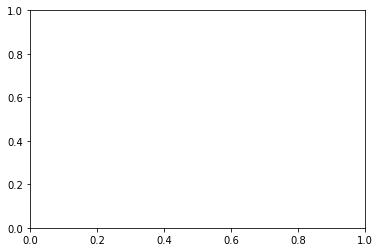

In [6]:
x = X_test.loc[[20]]
k = 10

dists = []
for di in intervals:
    dists.append( di.get_min_dist_to_point(x) )

ax = plt.subplot()
p2g.plot_db()

X_train.plot(kind='scatter', x=0, y=1, ax=ax, marker='x')
x.plot(kind='scatter', x=0, y=1, ax=ax, c='r')

for di in np.array(intervals)[np.argsort(dists)][:k]:
    #print(di.border_features)
    #print(di.border_bounds_discrepancies)

    plt.plot(di.border_features.iloc[:,0], di.border_features.iloc[:,1])
